In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [59]:
# Load the dataset
df = pd.read_csv('Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241129.csv')

# Inspect the data

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB
None


In [60]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [61]:
print(df.isnull().sum())

# Fill missing values (interpolation for numerical data)
df.fillna(method='ffill', inplace=True)  # Forward fill


Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


In [62]:
#df['Other'].fillna(0, inplace=True)
df['Other'].fillna(df['Other'].mean(), inplace=True)  # Mean

In [63]:
print(df.isnull().sum())


Date            0
Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64


In [64]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


In [65]:
df.set_index('Date', inplace=True)


In [66]:
# monthly_data = df.resample('M').sum()  # Resample by month


In [67]:
df

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2024-08-30,16436,10705,225,19026,3925,59.0
2023-09-15,15499,10671,267,18421,4519,61.0
2021-12-28,1756,2352,0,3775,0,13.0
2023-01-11,10536,8347,223,14072,0,48.0
2021-09-11,820,612,0,1283,0,11.0
...,...,...,...,...,...,...
2023-01-19,11337,8671,262,14881,0,66.0
2023-08-16,16791,11800,387,20936,4684,113.0
2022-01-10,5732,3548,73,6644,0,25.0


In [68]:
#Overall trends

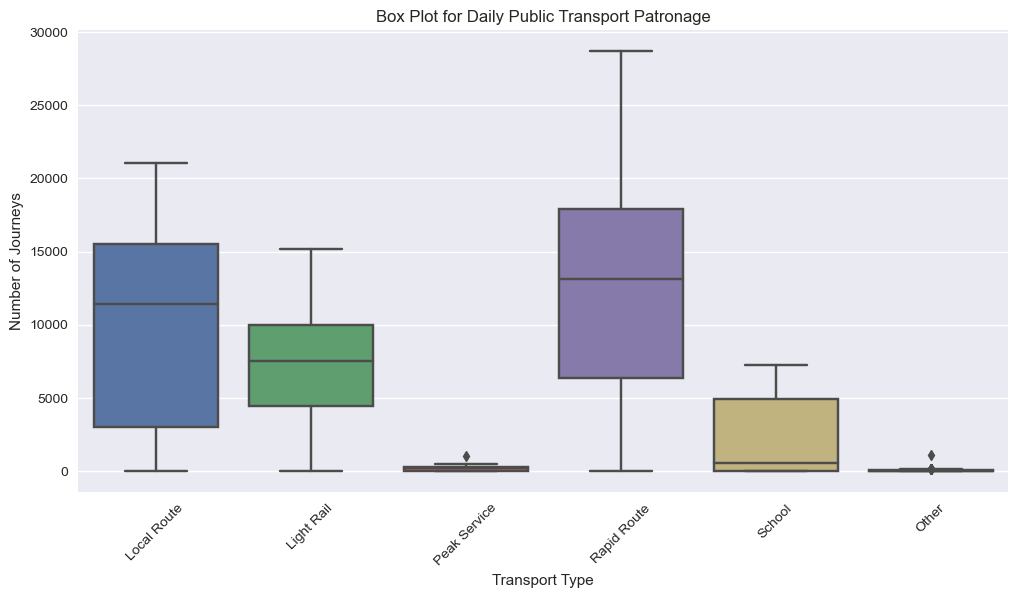

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for the selected transport types
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']])
plt.title('Box Plot for Daily Public Transport Patronage')
plt.ylabel('Number of Journeys')
plt.xlabel('Transport Type')
plt.xticks(rotation=45)
plt.show()


The Rapid Route has the highest ridership and variability, followed by the Local Route, which shows more stable usage. 
School and Other routes have minimal ridership and low variability, indicating consistent but low patronage.

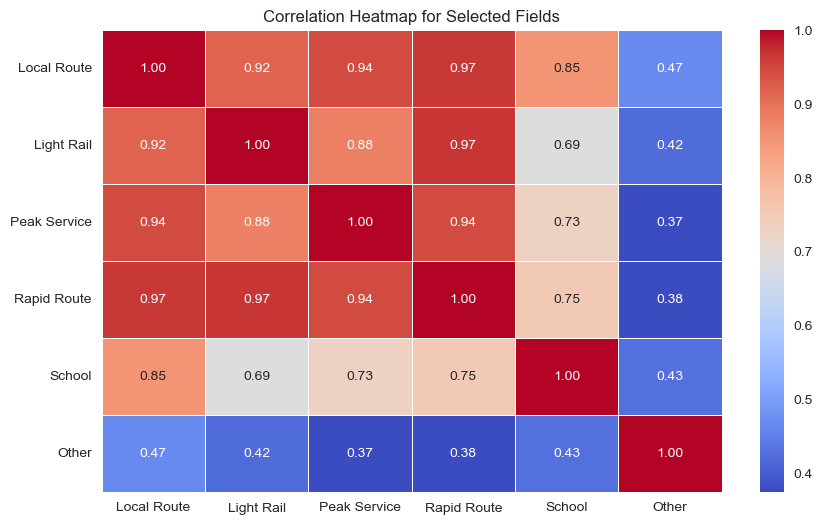

              Local Route  Light Rail  Peak Service  Rapid Route    School  \
Local Route      1.000000    0.918795      0.944390     0.965122  0.852356   
Light Rail       0.918795    1.000000      0.879347     0.967736  0.685795   
Peak Service     0.944390    0.879347      1.000000     0.944997  0.728795   
Rapid Route      0.965122    0.967736      0.944997     1.000000  0.754290   
School           0.852356    0.685795      0.728795     0.754290  1.000000   
Other            0.465264    0.418107      0.374033     0.375170  0.425794   

                 Other  
Local Route   0.465264  
Light Rail    0.418107  
Peak Service  0.374033  
Rapid Route   0.375170  
School        0.425794  
Other         1.000000  


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for the correlation plot
corr_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

# Generate the correlation matrix
correlation_matrix = df[corr_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Selected Fields")
plt.show()
print(correlation_matrix)

"Local Route" and "Rapid Route" have a very strong positive correlation (0.97), indicating similar trends.

"Light Rail" and "Rapid Route" also show a high correlation (0.97), suggesting shared usage patterns.

The "Other" category has weaker correlations, suggesting it represents less predictable or diverse transport patterns.

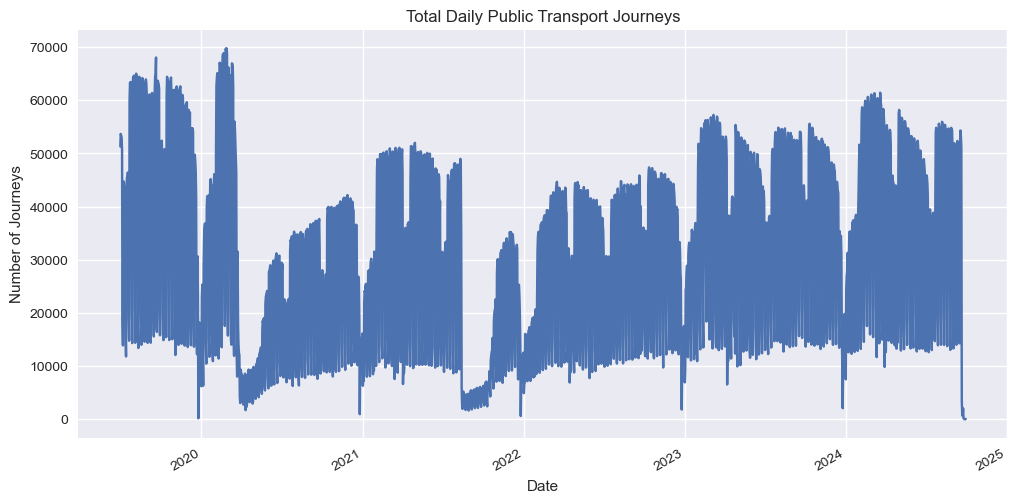

In [71]:
df['Total Journeys'] = df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum(axis=1)

# Plot total journeys
df['Total Journeys'].plot(figsize=(12, 6), title="Total Daily Public Transport Journeys")
plt.ylabel("Number of Journeys")
plt.xlabel("Date")
plt.show()


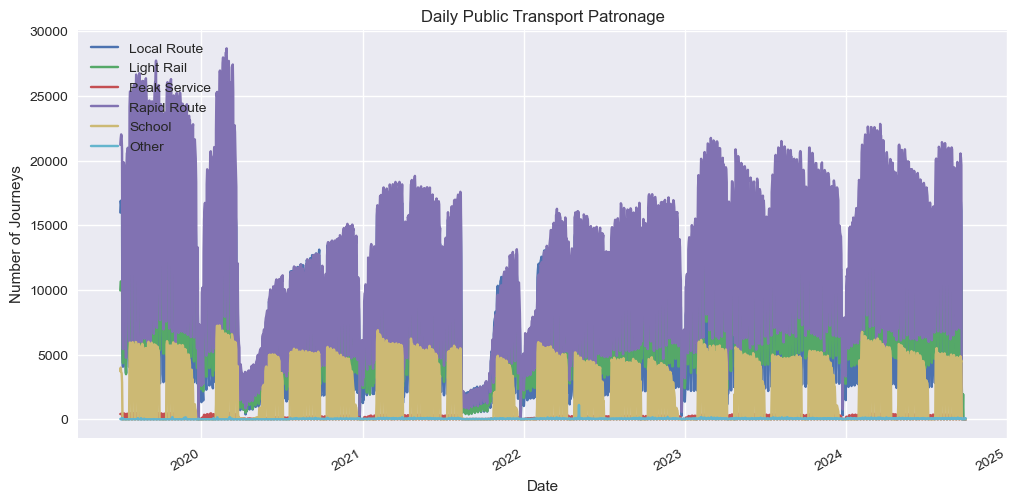

In [72]:
# Plot each column
df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].plot(figsize=(12, 6))
plt.title("Daily Public Transport Patronage")
plt.ylabel("Number of Journeys")
plt.xlabel("Date")
plt.legend(loc='upper left')
plt.show()


The Rapid Route shows the highest and most consistent patronage, especially during peak periods.

Seasonal fluctuations are evident, with clear peaks and valleys in ridership, likely influenced by events or holidays.

Both Light Rail and Local Route exhibit a growing trend, especially after 2022, indicating increased usage.

School and Other categories have stable but low ridership, showing minimal seasonal variation.

Overall, there is a gradual increase in patronage across all transport types, suggesting rising demand over time.

Text(0.5, 0, 'Date')

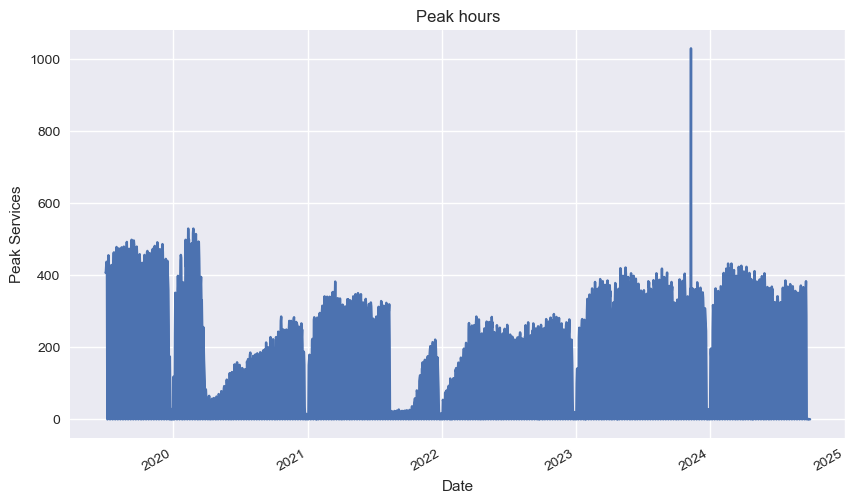

In [73]:
import matplotlib.pyplot as plt
 
# Set pyplot style
plt.style.use("seaborn")

# Plot
df['Peak Service'].plot(title='Peak hours', figsize=(10,6))
plt.ylabel('Peak Services')
plt.xlabel('Date')

In [74]:
import matplotlib.pyplot as plt



<Figure size 1200x600 with 0 Axes>

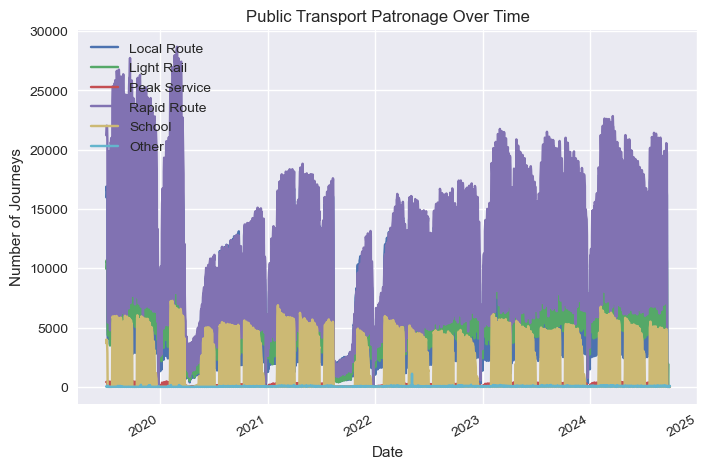

In [75]:
# Step 4: Trend Analysis (Plot the Data)
plt.figure(figsize=(12, 6))
df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].plot()
plt.title("Public Transport Patronage Over Time")
plt.ylabel("Number of Journeys")
plt.xlabel("Date")
plt.legend(loc='upper left')
plt.show()


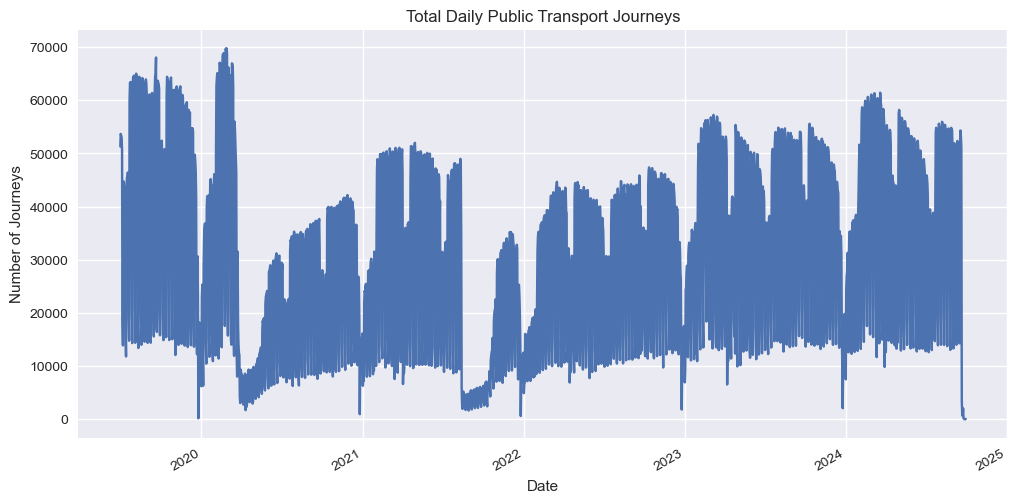

In [76]:
# Optional: Aggregating total journeys (for simplicity)
df['Total Journeys'] = df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum(axis=1)

# Plot total journeys
df['Total Journeys'].plot(figsize=(12, 6), title="Total Daily Public Transport Journeys")
plt.ylabel("Number of Journeys")
plt.xlabel("Date")
plt.show()


In [77]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]


In [38]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [78]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\li

             Local Route   Light Rail  Peak Service   Rapid Route  \
2023-07-27  10621.362477  7357.877979    225.262009  13023.112684   
2023-07-28  10595.916728  7297.432739    224.647679  13143.025123   
2023-07-29  10794.133974  7407.461755    227.227344  13332.271651   
2023-07-30   9939.385791  6705.412512    197.878002  12061.123988   
2023-07-31  10080.526330  6895.252704    208.353667  12339.888196   
2023-08-01  11541.347816  7933.008169    239.468356  14178.906968   
2023-08-02  10608.388456  7276.332091    221.027175  13029.083369   

                 School      Other  Total Journeys  
2023-07-27  1593.224442  59.984708    32932.062923  
2023-07-28  1652.476613  60.595183    33002.269302  
2023-07-29  2284.949634  62.922905    34061.177083  
2023-07-30  1766.640322  56.811840    30749.822040  
2023-07-31  1856.512415  59.116393    31401.536290  
2023-08-01  2427.653135  65.891605    36426.805917  
2023-08-02  1925.888233  60.987970    33137.926836  


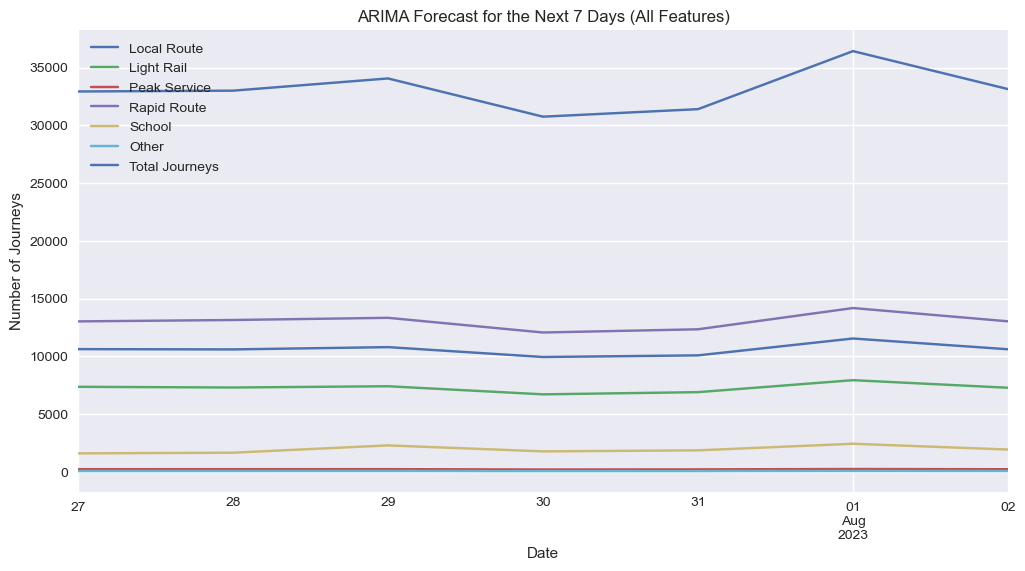

In [46]:
def arima_forecast(df, column, forecast_days=7):
    model = ARIMA(df[column], order=(5, 1, 0))  # Adjust order as needed
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=forecast_days)
    return forecast

# Forecast for the next 7 days for each feature
forecast_values = {}

for column in df.columns:
    forecast_values[column] = arima_forecast(df, column)

# Display the forecasted values
forecast_df = pd.DataFrame(forecast_values)
forecast_df.index = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')
print(forecast_df)

# Plot the forecasted values
forecast_df.plot(figsize=(12, 6))
plt.title("ARIMA Forecast for the Next 7 Days (All Features)")
plt.ylabel("Number of Journeys")
plt.xlabel("Date")
plt.legend(loc='upper left')
plt.show()

In [79]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [80]:
# Function to preprocess and create the dataset
def create_dataset(series, time_step=1):
    X, y = [], []
    for i in range(len(series) - time_step):
        X.append(series[i:i+time_step, 0])
        y.append(series[i + time_step, 0])
    return np.array(X), np.array(y)

# Function to train LSTM and forecast for the next 7 days
def train_lstm_forecast(df, column, time_step=10, forecast_days=7):
    # Scaling the feature (min-max scaling)
    scaler = MinMaxScaler(feature_range=(0, 1))
    series = df[column].values
    series_scaled = scaler.fit_transform(series.reshape(-1, 1))

    # Prepare the data for LSTM
    X, y = create_dataset(series_scaled, time_step)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Split the data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    # Forecasting the next 7 days
    last_sequence = series_scaled[-time_step:].reshape(1, time_step, 1)
    forecasted_values = []

    for _ in range(forecast_days):  # Forecast for the next 7 days
        next_value = model.predict(last_sequence)
        forecasted_values.append(next_value[0][0])
        last_sequence = np.append(last_sequence[:, 1:, :], next_value.reshape(1, 1, 1), axis=1)

    # Inverse transform the predictions to original scale
    forecasted_values_rescaled = scaler.inverse_transform(np.array(forecasted_values).reshape(-1, 1))

    return forecasted_values_rescaled

# Forecasting the next 7 days for each feature in the dataset
forecast_values_all_features = {}
for column in df.columns:
    print(f"Training LSTM model for {column}")
    forecast_values_all_features[column] = train_lstm_forecast(df, column)

# Combine the forecasted values into a DataFrame
forecast_df_lstm = pd.DataFrame(forecast_values_all_features)
forecast_df_lstm.index = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')

# Display the forecasted values
print(forecast_df_lstm)

# Plot the forecasted values
forecast_df_lstm.plot(figsize=(12, 6))
plt.title("LSTM Forecast for the Next 7 Days (All Features)")
plt.ylabel("Number of Journeys")
plt.xlabel("Date")
plt.legend(loc='upper left')
plt.show()

Training LSTM model for Local Route


C:\Users\91995\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Training LSTM model for Light Rail


C:\Users\91995\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Training LSTM model for Peak Service


C:\Users\91995\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Training LSTM model for Rapid Route


C:\Users\91995\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Training LSTM model for School


C:\Users\91995\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Training LSTM model for Other


C:\Users\91995\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Training LSTM model for Total Journeys


C:\Users\91995\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


ValueError: Per-column arrays must each be 1-dimensional